In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = "ai_job_dataset.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bismasajjad/global-ai-job-market-and-salary-trends-2025",
  file_path,
)
df_cleaned = df.dropna()

C:\Users\lazar\AppData\Local\Temp\ipykernel_944\2566293134.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [9]:
filter_us = df_cleaned['company_location'] == 'United States'
df_us = df_cleaned[filter_us]

In [10]:
df_grouped = df_us.groupby(['years_experience', 'experience_level']).size().reset_index(name='value')

In [11]:
filter_en = df_grouped['experience_level'] == 'EN'
filter_mi = df_grouped['experience_level'] == 'MI'
filter_se = df_grouped['experience_level'] == 'SE'
filter_ex = df_grouped['experience_level'] == 'EX'

df_en = df_grouped[filter_en]
df_mi = df_grouped[filter_mi]
df_se = df_grouped[filter_se]
df_ex = df_grouped[filter_ex]

df_en

,years_experience,experience_level,value
0,0,EN,81
1,1,EN,93


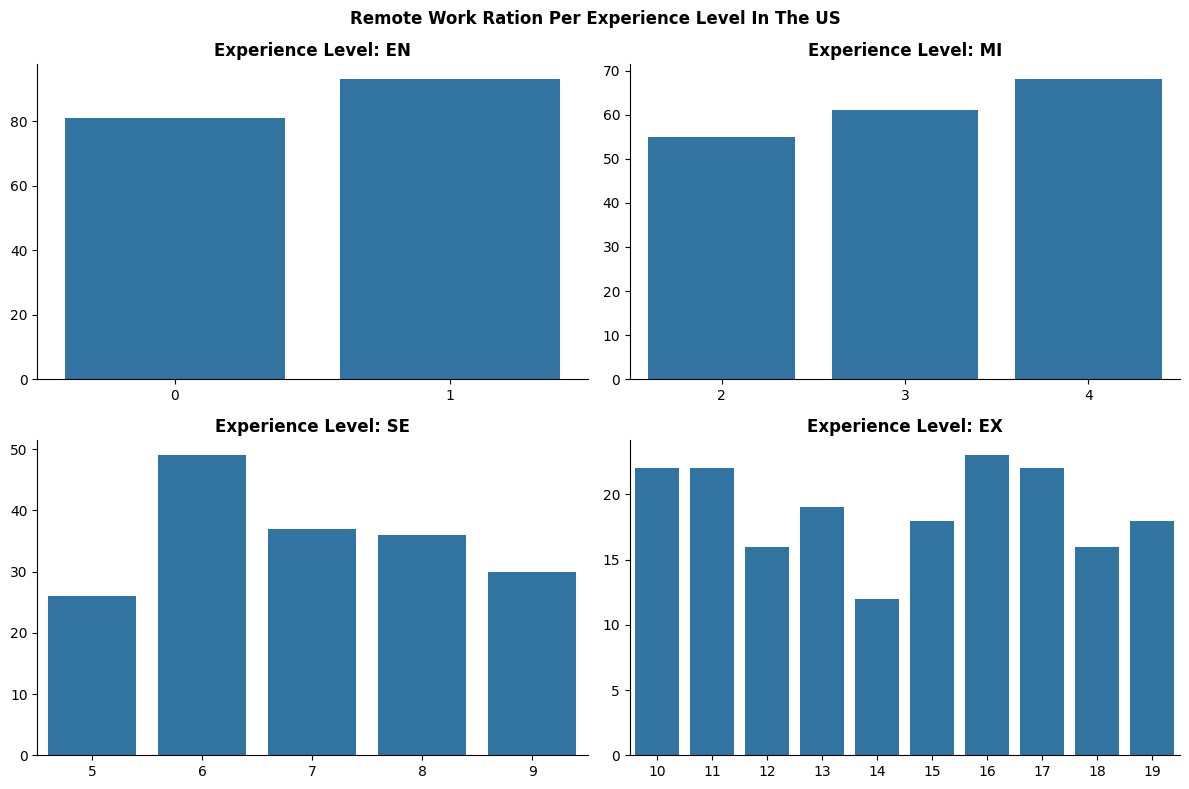

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(ax=ax[0, 0], data=df_en, x='years_experience', y='value')
sns.barplot(ax=ax[0, 1], data=df_mi, x='years_experience', y='value')
sns.barplot(ax=ax[1, 0], data=df_se, x='years_experience', y='value')
sns.barplot(ax=ax[1, 1], data=df_ex, x='years_experience', y='value')

sns.despine()

ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("")
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("")
ax[1, 1].set_xlabel("")
ax[1, 1].set_ylabel("")

ax[0, 0].set_title("Experience Level: EN", fontweight="bold")
ax[0, 1].set_title("Experience Level: MI", fontweight="bold")
ax[1, 0].set_title("Experience Level: SE", fontweight="bold")
ax[1, 1].set_title("Experience Level: EX", fontweight="bold")

plt.suptitle("Remote Work Ration Per Experience Level In The US", fontweight='bold')

plt.tight_layout()
plt.show()